# PREDICTION OF CAR PRICES USING LINEAR REGRESSION

<img src="car.jpg" style="width:500px;height:300px"/>

# PROJECT PURPOSE

The purpose of car price prediction is to estimate the value of a car in the market based on various factors, such as its make and model, year of manufacture, mileage, condition, and location. Car price prediction is useful for buyers who want to make an informed decision about purchasing a car, as well as for sellers who want to set a fair price for their vehicle. It can also be used by insurance companies, banks, and other financial institutions to determine the value of a car for insurance or loan purposes.

# HERE "PRICE" WILL BE THE TARGET VALUE FOR WHICH WE ARE DOING THE PREDICTION

<b> Importing Packages </b>

In [1]:
import pandas as pd #use for working with datasets
import numpy as np #use to provide array objects
import matplotlib.pyplot as plt #use to make interactive visualizations
import seaborn as sns #use to plot functions operated on dataframes and arrays

<b> Reading of dataset </b>

In [3]:
car_price = pd.read_csv("Automobile.csv", index_col=0)
car_price

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0


In [4]:
car_price.set_index('index', inplace=True)
car_price

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...
81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0


<b> Showing First Five Data </b>

In [5]:
car_price.head()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


<b> Showing Dimensions of the original dataframe </b>

In [6]:
car_price.shape #use to find dimensions of the dataframe

(61, 9)

<b> Showing the data types </b>

In [7]:
car_price.dtypes #describes how the bytes in the fixed-size block of memory corresponding to an array item should be interpreted

company              object
body-style           object
wheel-base          float64
length              float64
engine-type          object
num-of-cylinders     object
horsepower            int64
average-mileage       int64
price               float64
dtype: object

<b> Checking of null value </b>

In [8]:
car_price.info() #checking the presence of null-value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           61 non-null     object 
 1   body-style        61 non-null     object 
 2   wheel-base        61 non-null     float64
 3   length            61 non-null     float64
 4   engine-type       61 non-null     object 
 5   num-of-cylinders  61 non-null     object 
 6   horsepower        61 non-null     int64  
 7   average-mileage   61 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.8+ KB


<b> Removing null value from the original dataset </b>

In [9]:
car_price.dropna(inplace=True) #removing the null-value from the original dataset

<b> Checking of null value removal </b>

In [10]:
car_price.info() #checking of the removal of null-value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 88
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           58 non-null     object 
 1   body-style        58 non-null     object 
 2   wheel-base        58 non-null     float64
 3   length            58 non-null     float64
 4   engine-type       58 non-null     object 
 5   num-of-cylinders  58 non-null     object 
 6   horsepower        58 non-null     int64  
 7   average-mileage   58 non-null     int64  
 8   price             58 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 4.5+ KB


<b> Analysing of the dataset shape after removing null values </b>

In [11]:
car_price.shape

(58, 9)

<b> Slicing of the data set </b>

In [14]:
Y = car_price.iloc[:, 8] #target
X = car_price.iloc[:, 0:8] #feature

In [15]:
X

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage
index,,,,,,,,
0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21
1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19
3,audi,sedan,99.8,176.6,ohc,four,102,24
4,audi,sedan,99.4,176.6,ohc,five,115,18
5,audi,sedan,99.8,177.3,ohc,five,110,19
6,audi,wagon,105.8,192.7,ohc,five,110,19
9,bmw,sedan,101.2,176.8,ohc,four,101,23
10,bmw,sedan,101.2,176.8,ohc,four,101,23


In [16]:
Y

index
0     13495.0
1     16500.0
2     16500.0
3     13950.0
4     17450.0
5     15250.0
6     18920.0
9     16430.0
10    16925.0
11    20970.0
13    30760.0
14    41315.0
15    36880.0
16     5151.0
17     6295.0
18     6575.0
19     6377.0
20     6229.0
27     7295.0
28    12945.0
29    10345.0
30     6785.0
33    32250.0
34    35550.0
35    36000.0
36     5195.0
37     6095.0
38     6795.0
39    11845.0
43    18344.0
44    25552.0
45    28248.0
46    40960.0
47    45400.0
49     5389.0
50     6189.0
51     6989.0
52     8189.0
53     7099.0
54     6649.0
55     6849.0
56     7349.0
57    13499.0
61    34028.0
62    37028.0
66     5348.0
67     6338.0
68     6488.0
69     6918.0
70     7898.0
71     8778.0
79    15750.0
80     7775.0
81     7975.0
82     7995.0
86     9995.0
87    12940.0
88    13415.0
Name: price, dtype: float64

<b> Identifying the Unique Values </b>

In [17]:
car_price.company.unique() #To find the unique values in a Series Object

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mitsubishi',
       'nissan', 'porsche', 'toyota', 'volkswagen', 'volvo'], dtype=object)

<b> Detection of Missing Values </b>

In [18]:
car_price.isna().sum().to_frame() #use to detect missing values for an array-like object

,0
company,0
body-style,0
wheel-base,0
length,0
engine-type,0
num-of-cylinders,0
horsepower,0
average-mileage,0
price,0


<b> Execution of dummies </b>

In [19]:
X = pd.get_dummies(X) #Converts catergorical value in indicator variables
X

,wheel-base,length,horsepower,average-mileage,company_alfa-romero,company_audi,company_bmw,company_chevrolet,company_dodge,company_honda,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two
index,,,,,,,,,,,,,,,,,,,,,
0,88.6,168.8,111,21,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,111,21,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,154,19,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,99.8,176.6,102,24,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,99.4,176.6,115,18,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,99.8,177.3,110,19,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,105.8,192.7,110,19,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,101.2,176.8,101,23,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10,101.2,176.8,101,23,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<b> Selecting the categorical values </b>

In [20]:
category_cols = car_price.select_dtypes(['object']).columns
category_cols

Index(['company', 'body-style', 'engine-type', 'num-of-cylinders'], dtype='object')

In [21]:
for col in category_cols:
    print(car_price[col].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mitsubishi' 'nissan' 'porsche' 'toyota'
 'volkswagen' 'volvo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


# Using of scikit-learn for predictive data analysis

Scikit-learn is a popular machine learning library for Python that provides a wide range of tools and algorithms for building predictive models. Its purpose is to provide a user-friendly and efficient platform for implementing various machine learning techniques, including classification, regression, clustering, and dimensionality reduction.

<b> Splliting of dataset </b>

In [32]:
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
X_train, X_test, Y_train, Y_test= train_test_split(X,
                                                   Y,
                                                  test_size=0.20,
                                                  random_state=0)

<b> Printing the shape of Train and Test Data </b>

In [33]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (46, 38)
X_test shape: (12, 38)
Y_train shape: (46,)
Y_test shape: (12,)


<b> Visualization of Train Value (X_train) </b>

In [34]:
X_train

,wheel-base,length,horsepower,average-mileage,company_alfa-romero,company_audi,company_bmw,company_chevrolet,company_dodge,company_honda,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two
index,,,,,,,,,,,,,,,,,,,,,
43,104.9,175.0,72,31,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
55,94.5,165.3,69,31,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
46,120.9,208.1,184,14,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
56,94.5,170.2,69,31,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
52,96.3,172.4,88,25,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,101.2,176.8,101,23,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17,94.5,155.9,70,38,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
45,110.0,190.9,123,22,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
39,95.3,169.0,101,17,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


<b> Mean Value of X_Train </b>

In [35]:
X_train.mean()

wheel-base                  98.300000
length                     172.943478
horsepower                 101.695652
average-mileage             26.065217
company_alfa-romero          0.043478
company_audi                 0.065217
company_bmw                  0.086957
company_chevrolet            0.065217
company_dodge                0.043478
company_honda                0.065217
company_isuzu                0.021739
company_jaguar               0.043478
company_mazda                0.086957
company_mercedes-benz        0.065217
company_mitsubishi           0.043478
company_nissan               0.086957
company_porsche              0.043478
company_toyota               0.108696
company_volkswagen           0.086957
company_volvo                0.043478
body-style_convertible       0.065217
body-style_hardtop           0.021739
body-style_hatchback         0.195652
body-style_sedan             0.543478
body-style_wagon             0.173913
engine-type_dohc             0.086957
engine-type_

<b> Visualization of test value (X_test) </b>

In [36]:
X_test

,wheel-base,length,horsepower,average-mileage,company_alfa-romero,company_audi,company_bmw,company_chevrolet,company_dodge,company_honda,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two
index,,,,,,,,,,,,,,,,,,,,,
50,93.7,157.3,68,31,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49,93.7,157.3,68,37,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
57,100.4,184.6,152,19,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
38,93.1,159.1,68,31,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14,103.5,193.8,182,16,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,94.5,171.2,154,19,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
47,112.0,199.2,184,14,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
66,95.7,158.7,62,35,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
33,113.0,199.6,176,15,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<b> Mean Value of X_Test </b>

In [37]:
X_test.mean()

wheel-base                  99.850000
length                     176.341667
horsepower                 122.750000
average-mileage             23.500000
company_alfa-romero          0.083333
company_audi                 0.083333
company_bmw                  0.166667
company_chevrolet            0.000000
company_dodge                0.000000
company_honda                0.000000
company_isuzu                0.000000
company_jaguar               0.083333
company_mazda                0.083333
company_mercedes-benz        0.083333
company_mitsubishi           0.166667
company_nissan               0.083333
company_porsche              0.000000
company_toyota               0.166667
company_volkswagen           0.000000
company_volvo                0.000000
body-style_convertible       0.000000
body-style_hardtop           0.083333
body-style_hatchback         0.416667
body-style_sedan             0.416667
body-style_wagon             0.083333
engine-type_dohc             0.083333
engine-type_

<b> Standard Deviation (Std) of X_Train </b>

In [38]:
X_train.std()

wheel-base                  6.813483
length                     13.391617
horsepower                 47.209166
average-mileage             7.738510
company_alfa-romero         0.206185
company_audi                0.249637
company_bmw                 0.284885
company_chevrolet           0.249637
company_dodge               0.206185
company_honda               0.249637
company_isuzu               0.147442
company_jaguar              0.206185
company_mazda               0.284885
company_mercedes-benz       0.249637
company_mitsubishi          0.206185
company_nissan              0.284885
company_porsche             0.206185
company_toyota              0.314696
company_volkswagen          0.284885
company_volvo               0.206185
body-style_convertible      0.249637
body-style_hardtop          0.147442
body-style_hatchback        0.401085
body-style_sedan            0.503610
body-style_wagon            0.383223
engine-type_dohc            0.284885
engine-type_l               0.147442
e

<b> Standard Deviation (Std) of X_Test </b>

In [39]:
X_test.std()

wheel-base                  6.954201
length                     16.517124
horsepower                 53.829909
average-mileage             8.681223
company_alfa-romero         0.288675
company_audi                0.288675
company_bmw                 0.389249
company_chevrolet           0.000000
company_dodge               0.000000
company_honda               0.000000
company_isuzu               0.000000
company_jaguar              0.288675
company_mazda               0.288675
company_mercedes-benz       0.288675
company_mitsubishi          0.389249
company_nissan              0.288675
company_porsche             0.000000
company_toyota              0.389249
company_volkswagen          0.000000
company_volvo               0.000000
body-style_convertible      0.000000
body-style_hardtop          0.288675
body-style_hatchback        0.514929
body-style_sedan            0.514929
body-style_wagon            0.288675
engine-type_dohc            0.288675
engine-type_l               0.000000
e

<b> Visualization of test value (Y_test) </b>

In [40]:
Y_test

index
50     6189.0
49     5389.0
57    13499.0
38     6795.0
14    41315.0
2     16500.0
47    45400.0
66     5348.0
33    32250.0
69     6918.0
4     17450.0
13    30760.0
Name: price, dtype: float64

<b> Visualization of train value (Y_train) </b>

In [41]:
Y_train

index
43    18344.0
55     6849.0
46    40960.0
56     7349.0
52     8189.0
9     16430.0
17     6295.0
45    28248.0
39    11845.0
87    12940.0
80     7775.0
27     7295.0
82     7995.0
37     6095.0
18     6575.0
5     15250.0
44    25552.0
19     6377.0
70     7898.0
29    10345.0
71     8778.0
10    16925.0
16     5151.0
36     5195.0
20     6229.0
61    34028.0
67     6338.0
79    15750.0
53     7099.0
1     16500.0
15    36880.0
88    13415.0
35    36000.0
6     18920.0
34    35550.0
51     6989.0
30     6785.0
28    12945.0
11    20970.0
54     6649.0
86     9995.0
3     13950.0
0     13495.0
81     7975.0
68     6488.0
62    37028.0
Name: price, dtype: float64

# Purpose of Label Encoder

The purpose of Label Encoder is to transform categorical variables into numerical variables so that machine learning algorithms can process them more easily. 
Label Encoder assigns a unique numerical value to each category in the categorical variable. For example, if the categorical variable is "fruit" and it has three categories (apple, banana, and orange), Label Encoder will assign the value 0 to apple, 1 to banana, and 2 to orange. 

<b> Imporing Label Encoder </b>

In [42]:
from sklearn.preprocessing import LabelEncoder

<b> Defining Label Encoder </b>

In [43]:
#defining label encoder object
le = LabelEncoder()
#encoding the labels in the column name "company"
car_price['company'] = le.fit_transform(car_price['company'])

<b> Visualization of last few rows </b>

In [45]:
car_price

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,0,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,0,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,0,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,1,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,1,sedan,99.4,176.6,ohc,five,115,18,17450.0
5,1,sedan,99.8,177.3,ohc,five,110,19,15250.0
6,1,wagon,105.8,192.7,ohc,five,110,19,18920.0
9,2,sedan,101.2,176.8,ohc,four,101,23,16430.0
10,2,sedan,101.2,176.8,ohc,four,101,23,16925.0


<b> Encoding labels in engine-type and body-style columns </b>


In [46]:
car_price['engine-type'] = le.fit_transform(car_price['engine-type'])
car_price['body-style'] = le.fit_transform(car_price['body-style'])

<b> Displaying the data frame </b>

In [47]:
car_price

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,0,0,88.6,168.8,0,four,111,21,13495.0
1,0,0,88.6,168.8,0,four,111,21,16500.0
2,0,2,94.5,171.2,4,six,154,19,16500.0
3,1,3,99.8,176.6,2,four,102,24,13950.0
4,1,3,99.4,176.6,2,five,115,18,17450.0
5,1,3,99.8,177.3,2,five,110,19,15250.0
6,1,4,105.8,192.7,2,five,110,19,18920.0
9,2,3,101.2,176.8,2,four,101,23,16430.0
10,2,3,101.2,176.8,2,four,101,23,16925.0


<b> Replacing the categorical value into numerical value by using "Replace" Function </b>

In [48]:
car_price = car_price.replace({'num-of-cylinders':{
                              'four':4,
                              'six':6,
                              'five':5,
                              'three':3,
                              'two':2,
                              'twelve':12,
                              'eight':8}
                              })

<b> Displaying of dataset after Replacing the following column </b>

In [49]:
car_price

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
index,,,,,,,,,
0,0,0,88.6,168.8,0,4,111,21,13495.0
1,0,0,88.6,168.8,0,4,111,21,16500.0
2,0,2,94.5,171.2,4,6,154,19,16500.0
3,1,3,99.8,176.6,2,4,102,24,13950.0
4,1,3,99.4,176.6,2,5,115,18,17450.0
5,1,3,99.8,177.3,2,5,110,19,15250.0
6,1,4,105.8,192.7,2,5,110,19,18920.0
9,2,3,101.2,176.8,2,4,101,23,16430.0
10,2,3,101.2,176.8,2,4,101,23,16925.0


<b> Applying Standard Scaler on data </b>

In [50]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

<b> Visualizing the data </b>

In [51]:
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [52]:
X_test_scaled.std(axis=0)

array([9.87998776e-01, 1.19393254e+00, 1.10376266e+00, 1.08593027e+00,
       1.35528800e+00, 1.11938137e+00, 1.32262566e+00, 5.55111512e-17,
       2.77555756e-17, 5.55111512e-17, 2.77555756e-17, 1.35528800e+00,
       9.80885438e-01, 1.11938137e+00, 1.82746996e+00, 9.80885438e-01,
       2.77555756e-17, 1.19733217e+00, 5.55111512e-17, 2.77555756e-17,
       0.00000000e+00, 1.89525072e+00, 1.24276350e+00, 9.89762411e-01,
       7.29182331e-01, 9.80885438e-01, 2.77555756e-17, 1.14287919e+00,
       2.77555756e-17, 2.12332822e+00, 2.77555756e-17, 1.89525072e+00,
       9.80885438e-01, 1.07144924e+00, 1.46387835e+00, 2.77555756e-17,
       2.77555756e-17, 2.77555756e-17])

<b> Executing Correlation and displaying it through colormap </b>

In [53]:
car_price.corr().style.background_gradient(cmap="YlGnBu")

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
company,1.000000,0.190051,-0.012603,-0.047085,0.126324,-0.097692,-0.187885,0.242883,-0.205502
body-style,0.190051,1.000000,0.432152,0.322310,-0.033776,-0.007318,-0.135047,0.022190,-0.110904
wheel-base,-0.012603,0.432152,1.000000,0.881866,0.070895,0.516737,0.509146,-0.547084,0.663085
length,-0.047085,0.322310,0.881866,1.000000,0.091408,0.633069,0.727067,-0.780370,0.788465
engine-type,0.126324,-0.033776,0.070895,0.091408,1.000000,0.304646,0.247286,-0.204637,0.191193
num-of-cylinders,-0.097692,-0.007318,0.516737,0.633069,0.304646,1.000000,0.843596,-0.616336,0.765225
horsepower,-0.187885,-0.135047,0.509146,0.727067,0.247286,0.843596,1.000000,-0.842615,0.901707
average-mileage,0.242883,0.022190,-0.547084,-0.780370,-0.204637,-0.616336,-0.842615,1.000000,-0.770217
price,-0.205502,-0.110904,0.663085,0.788465,0.191193,0.765225,0.901707,-0.770217,1.000000


<b> Heat Map Visualization of Correlation Matrix </b>

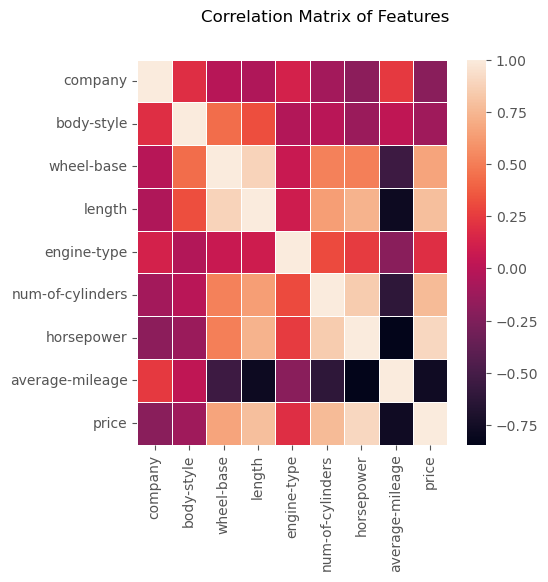

In [54]:
plt.figure(figsize=(5,5))
plt.style.use("ggplot")
sns.heatmap(data=car_price.corr(),
           annot=False,
           linewidth=.6)
plt.suptitle("Correlation Matrix of Features")
plt.show()

<b> Displaying the graphical representation of "Price" using histogram </b>

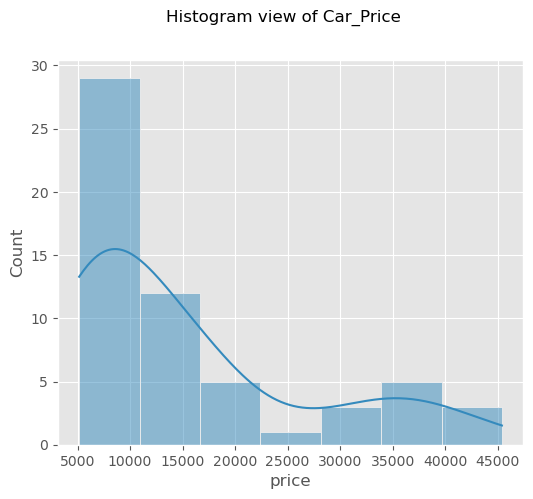

In [55]:
plt.figure(figsize=(6,5))
plt.style.use("ggplot")
sns.histplot(data=car_price, x="price",
           kde=True,
           linewidth=.6)

plt.suptitle("Histogram view of Car_Price")
plt.show()

<b> Displaying the graphical representation of "Price" using Boxplot </b>

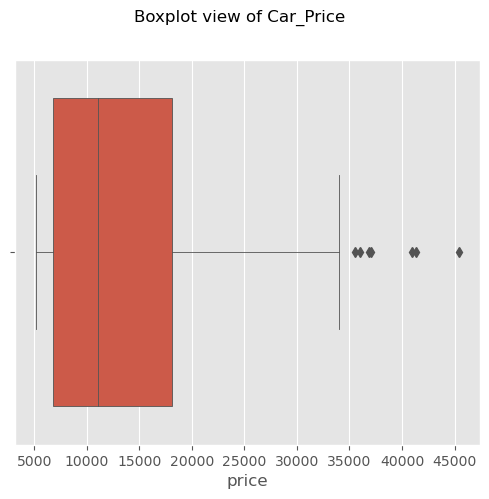

In [56]:
plt.figure(figsize=(6,5))
plt.style.use("ggplot")
sns.boxplot(data=car_price, x="price",
           linewidth=.6)
plt.suptitle("Boxplot view of Car_Price")
plt.show()

<b> Visualization of Car Price Distribution and Spread using Histogram and Box Plot </b>

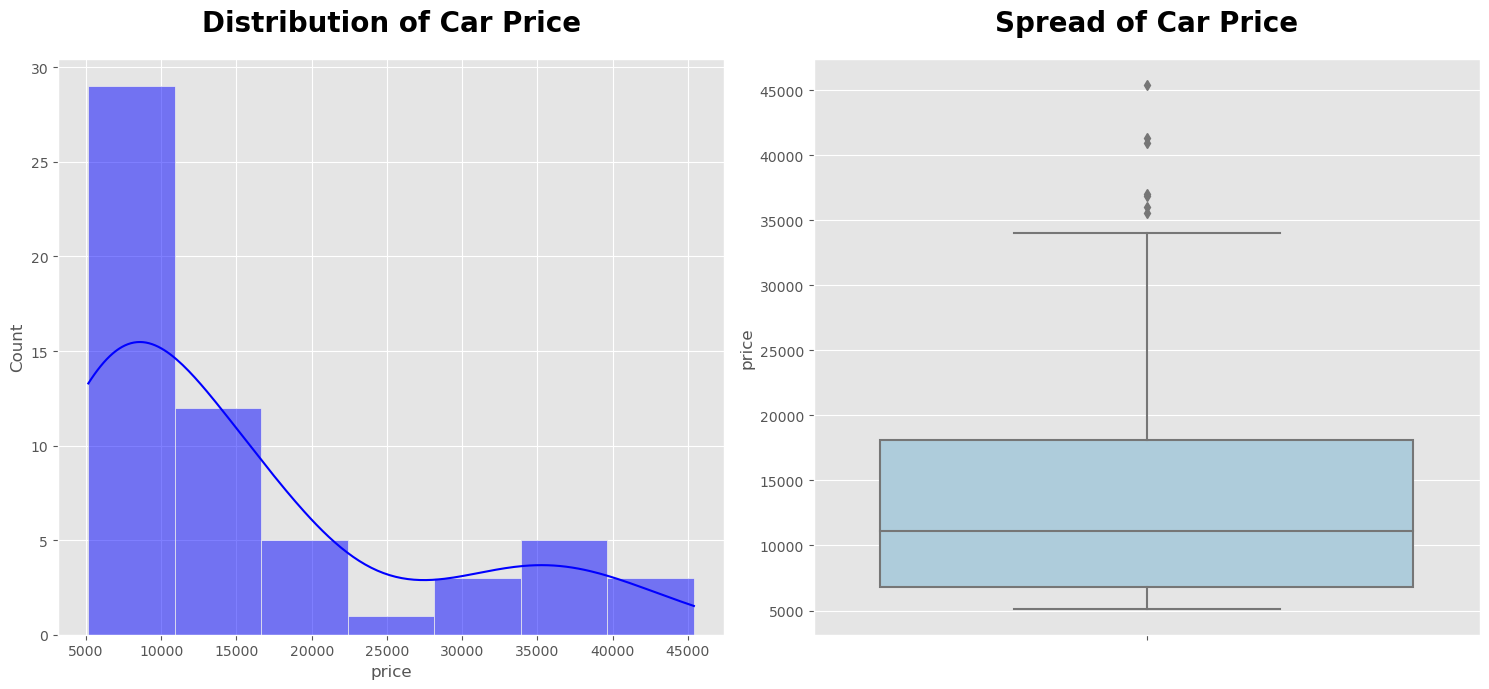

In [57]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(car_price["price"],color="blue",kde=True)
plt.title("Distribution of Car Price",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=car_price["price"],palette="Paired")
plt.title("Spread of Car Price",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

<b> Displaying Skew Value </b>

In [58]:
car_price.price.skew()

1.2319336876831786

# Variation of Car price using lineplot

<b> Price vs Company </b>

<AxesSubplot:xlabel='company', ylabel='price'>

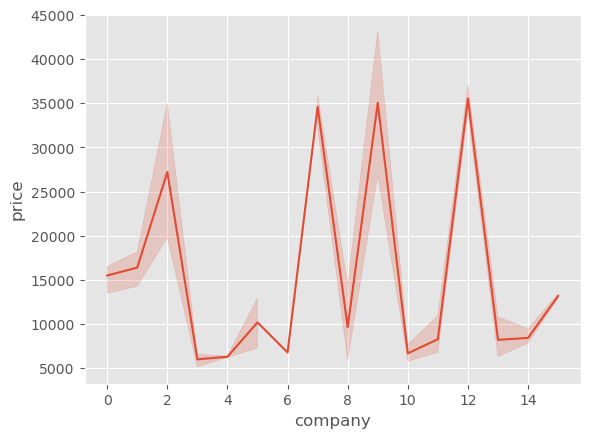

In [59]:
sns.lineplot(data=car_price, y="price", x="company")

<b> Price vs Number of Cylinders </b>

<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

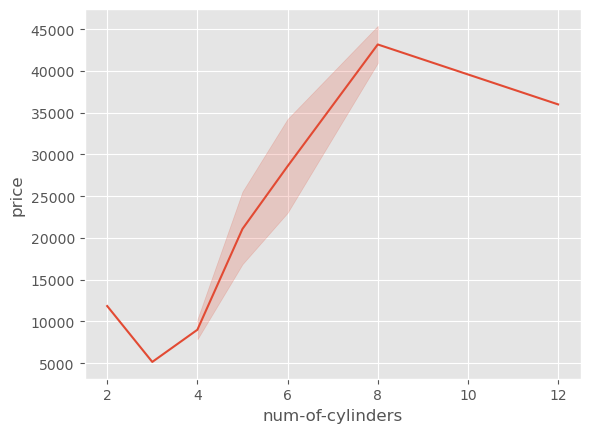

In [60]:
sns.lineplot(data=car_price, y="price", x="num-of-cylinders")

<b> Price vs Average-Mileage </b>

<AxesSubplot:xlabel='average-mileage', ylabel='price'>

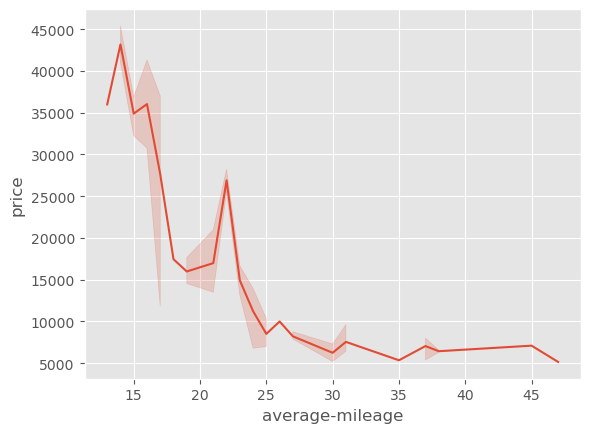

In [61]:
sns.lineplot(data=car_price, y="price", x="average-mileage")

<b> Price Vs Horse Power </b>

<AxesSubplot:xlabel='horsepower', ylabel='price'>

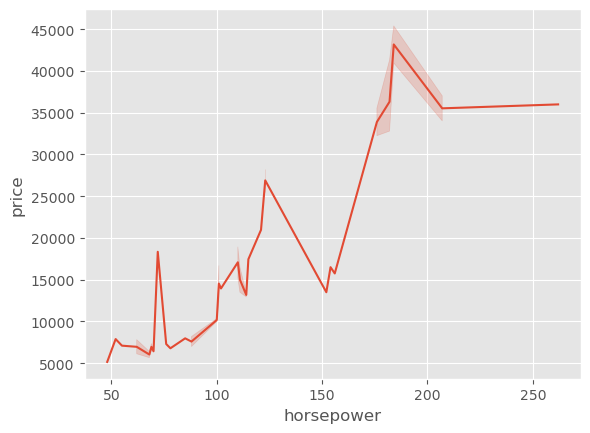

In [91]:
sns.lineplot(data=car_price, y="price", x="horsepower")

<b> Visualization using PairPlot </b>

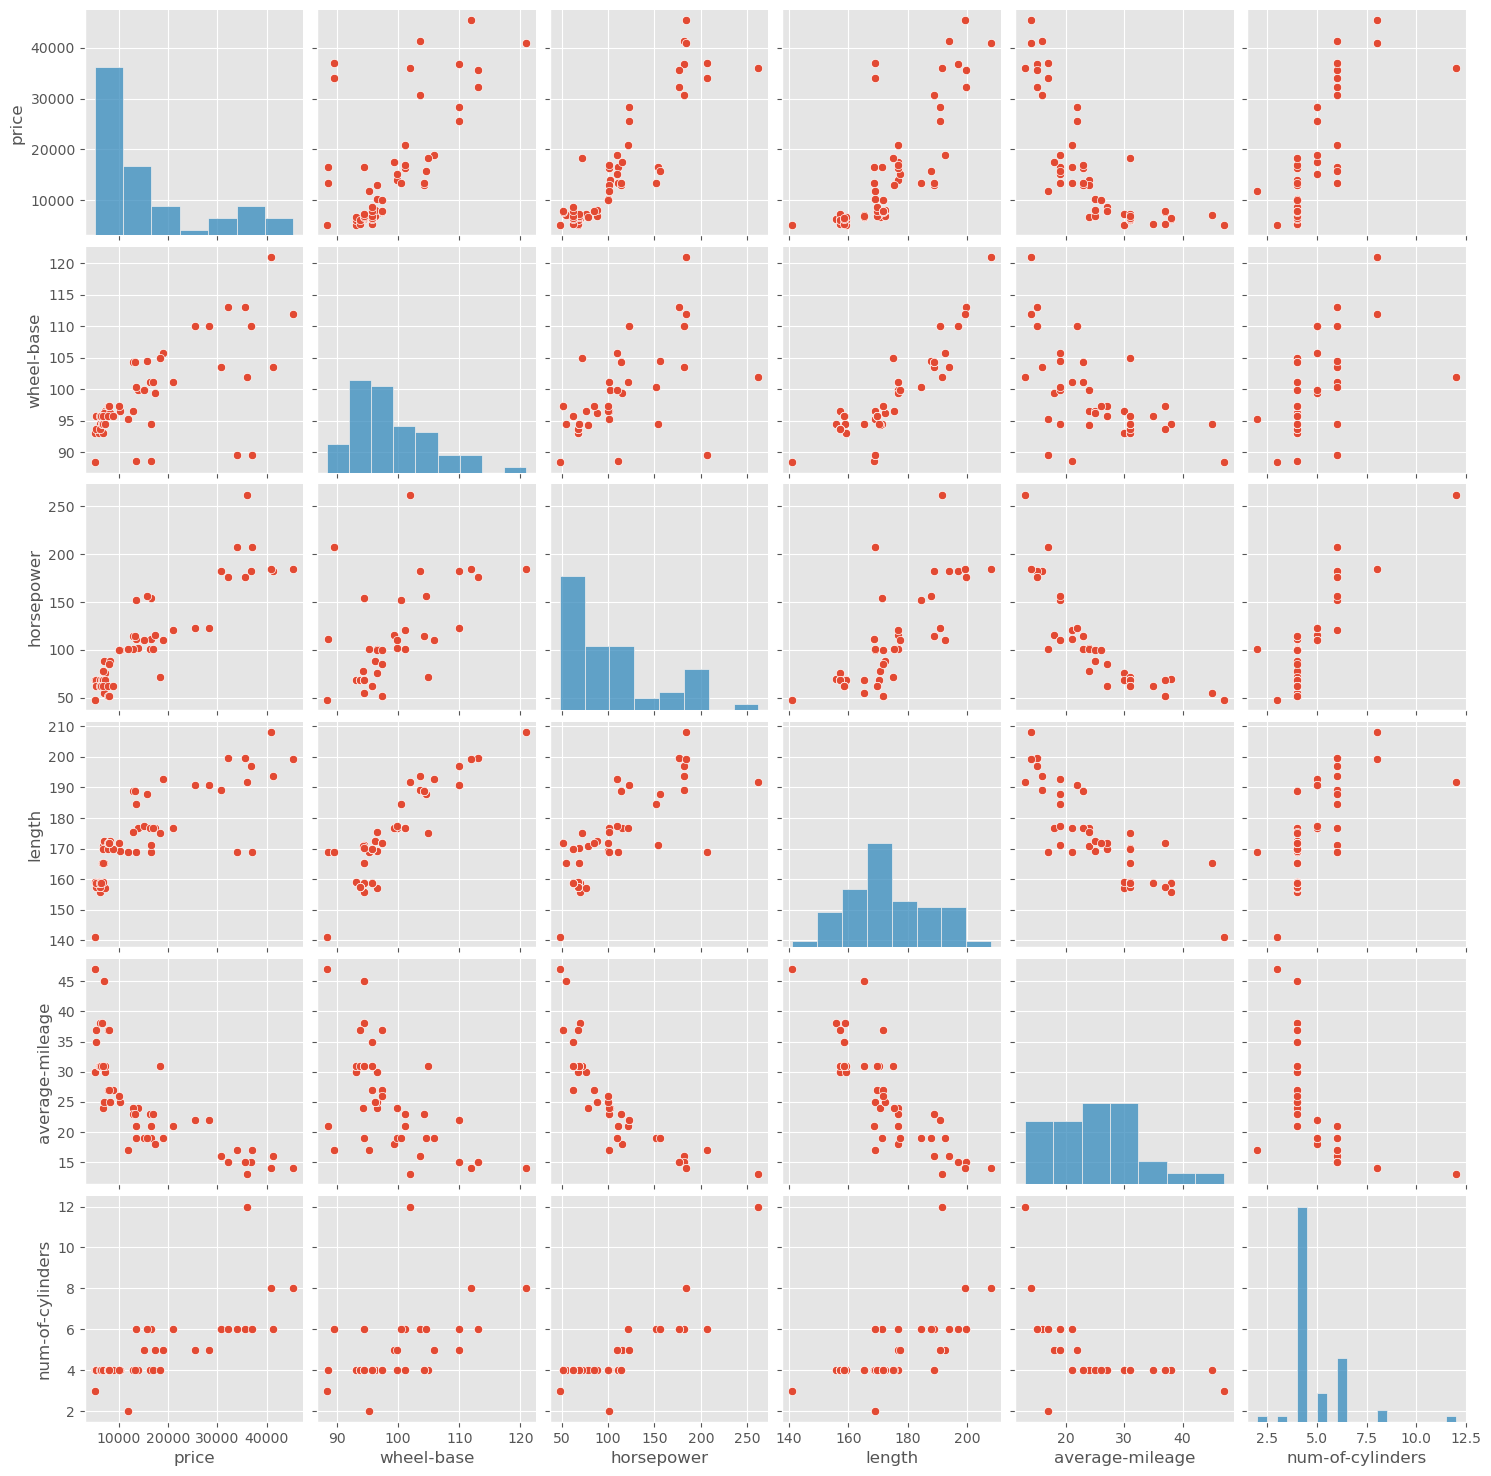

In [92]:
sns.pairplot(car_price[['price',
                       'wheel-base',
                       'horsepower',
                       'length',
                       'average-mileage',
                       'num-of-cylinders']])

<b> Importing and Fitting the model on the training data </b>

In [65]:
from sklearn.linear_model import LinearRegression

<b> Defining the model </b>

In [66]:
car_price_model = LinearRegression()

<b> Fitting the model on training data </b>

In [67]:
car_price_model.fit(X_train, Y_train)

LinearRegression()

<b> Checking the slope, m, and the intercept, c </b>

In [68]:
m = car_price_model.coef_
c = car_price_model.intercept_
m, c

(array([ 6.88676576e+02,  1.69136594e+02,  1.07840537e+02,  1.94083636e+02,
         8.97880899e+03, -2.03102718e+03,  4.22470434e-01, -1.53072796e+03,
         8.46644281e+02, -1.33751754e+03, -1.82222721e+03,  1.06096182e+04,
         5.95621284e+02, -1.56582322e+02, -3.95560158e+03, -1.74489152e+03,
         3.88151949e+03,  2.88458574e+01, -3.29145862e+03, -9.07144667e+03,
         7.93016424e+03,  4.93016424e+03, -4.79132343e+03, -4.03990817e+03,
        -4.02909689e+03, -9.99967588e+03,  4.04212710e+03,  3.28860353e+03,
         3.88151949e+03, -2.85661734e+03,  1.64404310e+03,  2.64861702e+03,
        -2.12068171e+03, -1.87119283e+03,  1.16232168e+03,  4.04212710e+03,
        -5.50523436e+03,  1.64404310e+03]),
 -95653.66224742038)

# <b> Target Prediction: Price against the predictors in the training and testing dataset </b>

<b> Predictions on the training data </b>

In [69]:
Y_predictions_train = car_price_model.predict(X_train)

<b> Predictions on the testing data </b>

In [70]:
Y_predictions_test = car_price_model.predict(X_test)

In [71]:
Y_predictions_test

array([ 1500.75413953,  2665.25595365, 17312.33667844,  5943.21692643,
       31546.79080277, 21170.68084177, 42295.53519024,  7228.63728006,
       35550.        ,  9075.03180543, 13662.46566421, 30734.93515087])

<b> Comparison with original data </b>

In [72]:
Y_test

index
50     6189.0
49     5389.0
57    13499.0
38     6795.0
14    41315.0
2     16500.0
47    45400.0
66     5348.0
33    32250.0
69     6918.0
4     17450.0
13    30760.0
Name: price, dtype: float64

<b> Displaying Mean Square Error </b>

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

<b> Validation of the data </b>

In [80]:
mean_squared_error(Y_test, Y_predictions_test)

17080166.79063343

<b> Mean squared error between Y_train and Y_predictions_train </b>

In [81]:
mean_squared_error(Y_train, Y_predictions_train)

418877.47427600296

<b> Printing Mean Absolute Error </b>

In [84]:
from sklearn.metrics import mean_absolute_error, r2_score

<b> Mean Absolute Error Between Y_test and Y_prediction_test </b>

In [85]:
mean_absolute_error(Y_test, Y_predictions_test)

3397.5610648333895

<b> Mean Absolute Error Between Y_train and Y_predictions_train </b>

In [86]:
mean_absolute_error(Y_train, Y_predictions_train)

447.6074486661477

<b> Printing the accuracy of the testing data </b>

In [95]:
accuracy = r2_score(Y_test, Y_predictions_test)
print(f"The Model has an accuracy of {accuracy*100:.2f}%")

The Model has an accuracy of 91.38%


<b> Printing the accuracy of the training data </b>

In [96]:
accuracy = r2_score(Y_train, Y_predictions_train)
print(f"The Model has an accuracy of {accuracy*100:.2f}%")

The Model has an accuracy of 99.59%


<b> Coefficient Determination </b>

In [102]:
r2score_train= r2_score(Y_train, Y_predictions_train) #between Y_train & Y_predictions_train
r2score_train

0.9959265725100377

In [104]:
r2score_test= r2_score(Y_test, Y_predictions_test) #between Y_test & Y_predictions_test
r2score_test

0.9138230277575169

<b> Plotting the graph of Regression </b>

<AxesSubplot:xlabel='price'>

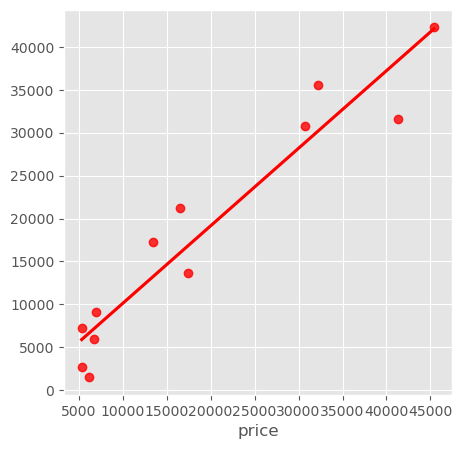

In [105]:
plt.figure(figsize=(5,5))
sns.regplot(x=Y_test, y=Y_predictions_test, ci=None, color="r")

<b> Displaying of Actual, Predictd and Error </b>

In [106]:
car_price = pd.DataFrame({"Actual": Y_test,
                       "Predicted": Y_predictions_test,
                       "Error": abs(Y_test-Y_predictions_test)})

car_price.head().style.background_gradient(cmap="RdYlGn")

,Actual,Predicted,Error
index,,,
50,6189.000000,1500.754140,4688.245860
49,5389.000000,2665.255954,2723.744046
57,13499.000000,17312.336678,3813.336678
38,6795.000000,5943.216926,851.783074
14,41315.000000,31546.790803,9768.209197


In [107]:
car_price.Error.describe()

count      12.000000
mean     3397.561065
std      2457.658664
min        25.064849
25%      2087.933174
50%      3202.232405
75%      4027.672719
max      9768.209197
Name: Error, dtype: float64

<b> Visualization of Actual, Predicted and Error Value for Car Price through Pair Plot </b>

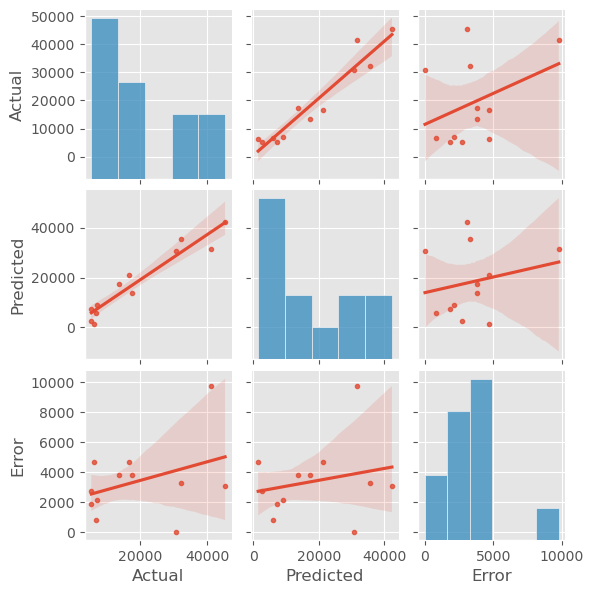

In [108]:
sns.pairplot(car_price.iloc[0:], kind="reg", height=2, markers=".")

<b> Visualization of Actual vs Predicted Value of Car Price </b>

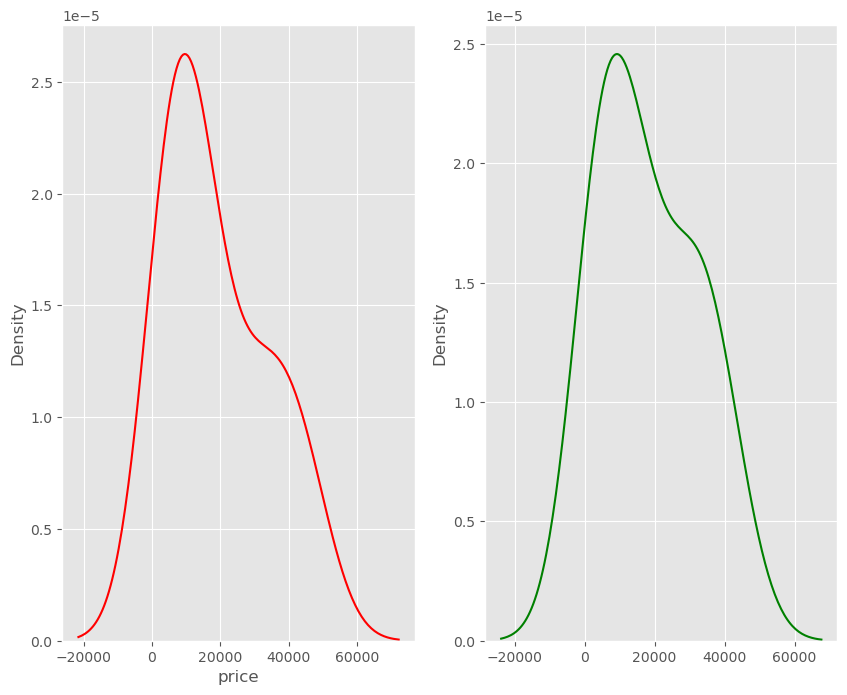

In [109]:
plt.figure(figsize=(10,8))
plt.subplot(121)
sns.kdeplot(Y_test, color="r", label="Actual Value")
plt.subplot(122)
sns.kdeplot(Y_predictions_test, color="green", label="Predicted Values")
plt.show()
plt.close()

<b> Scatter Plot Between Actual and Predicted Value </b>

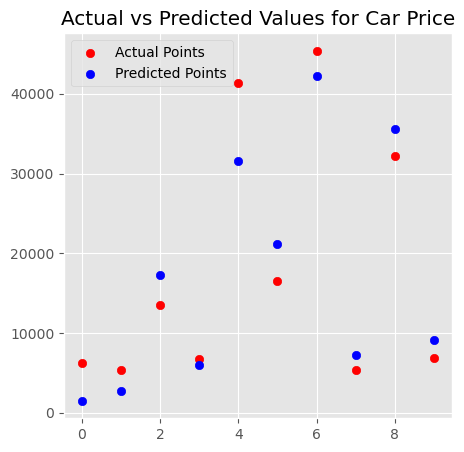

In [110]:
plt.figure(figsize=(5,5))
plt.style.use("ggplot")

plt.scatter(x=range(10),
            y=Y_test.head(10),
            color="r",
           label="Actual Points")
plt.scatter(x=range(10),
            y=Y_predictions_test[:10],
            color="b",
           label="Predicted Points")
plt.title('Actual vs Predicted Values for Car Price')
plt.legend()

<b> Dataframe of actual and predicted car price </b>

In [111]:
Car_Price=pd.DataFrame({
    "Actual Price":Y_test,
    "Predicted Price": Y_predictions_test
 })
print(Car_Price)

       Actual Price  Predicted Price
index                               
50           6189.0      1500.754140
49           5389.0      2665.255954
57          13499.0     17312.336678
38           6795.0      5943.216926
14          41315.0     31546.790803
2           16500.0     21170.680842
47          45400.0     42295.535190
66           5348.0      7228.637280
33          32250.0     35550.000000
69           6918.0      9075.031805
4           17450.0     13662.465664
13          30760.0     30734.935151
